### Import Required Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset into dataframe.

In [16]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [17]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [18]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Data Visualization

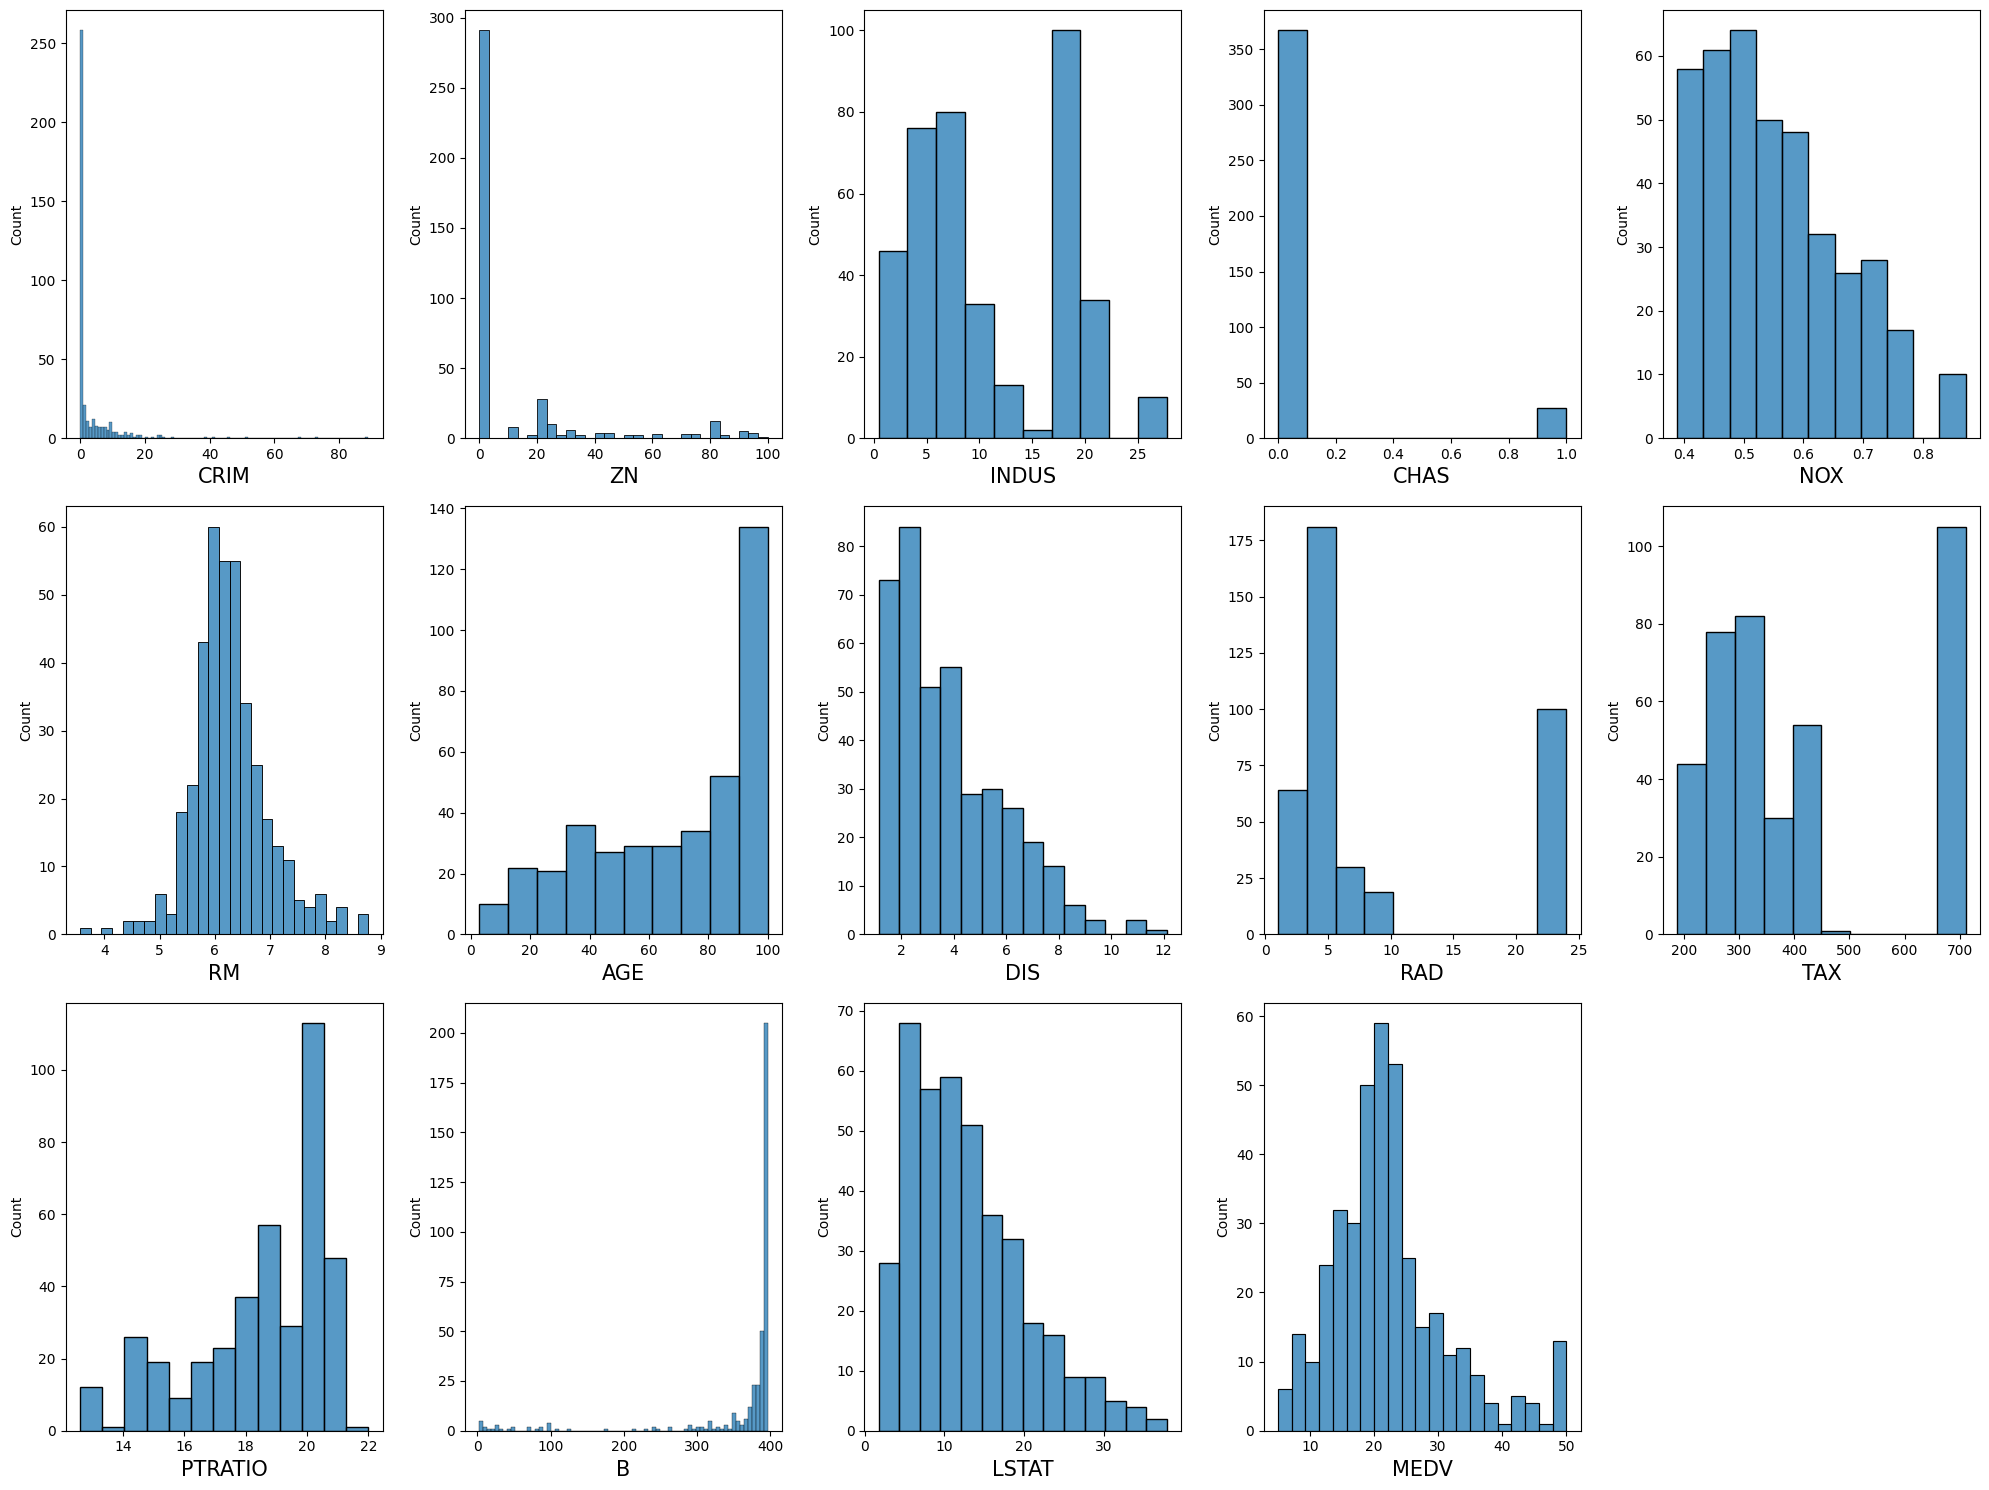

In [19]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### Finding Co-relation among variables

In [20]:
df.corr(method='pearson').sort_values(by='MEDV', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.397230,0.406822,-0.510829,0.173701,-0.459054,0.723951,-0.407470,0.279547,-0.416638,-0.508864,-0.543809,0.347256,-0.743450,1.000000
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
B,-0.386254,0.169894,-0.344788,0.068913,-0.384257,0.123320,-0.281990,0.285168,-0.444135,-0.435457,-0.179816,1.000000,-0.383783,0.347256
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054


#### From above pearson co-relation matrix, we come to know that, {RM, ZN, B, DIS, CHAS} are attributes with highest co-relation coefficient. Hence we will continue with this attributes

### Separating Input and Output Columns

In [21]:
X = df[['RM', 'ZN', 'B', 'DIS', 'CHAS']]
Y = df['MEDV']

### Splitting Test-Train Data

In [22]:
from sklearn.model_selection import train_test_split
 
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (315, 5)
xtest shape  :  (79, 5)
ytrain shape :  (315,)
ytest shape  :  (79,)


### Scaling Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(315, 5)   ==   (315,)


### Training Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
  
y_pred = reg.predict(xtest)

### Regression Model Prediction

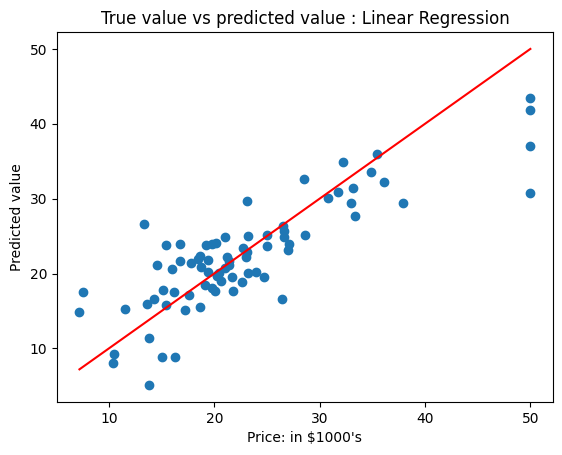

In [36]:
plt.scatter(ytest, y_pred)

ideal_values = np.linspace(min(ytest), max(ytest))  
plt.plot(ideal_values, ideal_values, color='red')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

### Comparing Error 

In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

MAE: 3.6648843091869225
MSE: 25.308634560134994
RMSE: 5.0307687842053515


In [27]:
# Print the intercept
print(f'Intercept: {reg.intercept_}\n')

Intercept: 22.240634920634925



In [28]:
print(reg.score(xtest, ytest))

0.6921819594342674
